## Receiver operating characteristic curves

Suppose that we have a binary classification task, in which we have to map a 'sample' $\mathbf{x}$ to a class $y \in \{ 0, 1\}$. We may use a machine learning method to learn a function $\hat{y} = h(\mathbf{x})$. 

How can we determine how good a binary classifier is at its task? 

One way in which one could do this is to simply take the percentage of times that the classifier is correct. So, if we apply the function $h$ to a test set of samples $\mathcal{X}$ with cardinality $N$, we could calculate the performance $p$:

$p = 100 \left( \sum_{i=1}^{N} \delta(y_i^*, \hat{y_i}) \right)$,

where $\delta$ is the Kronecker delta that returns 1 if its arguments are identical and 0 otherwise, and $y_i^*$ is the ground-truth class of sample $\mathbf{x}_i \in \mathcal{X}$. The main problem with this measure is that it may be very easy to obtain a really good performance if the classes $\{ 0, 1\}$ are _skewed_. For instance, if the classifier is to classify an image patch as containing a face or not, typically the chance that there is a face is much smaller than that there is no face in the patch. This means that a very high performance can be obtained just by means of always classifying the patch as having no face. 

In order to deal with potentially skewed classes, one could split the evaluation for each class. How many of the positive samples ($y=1$) are actually classified as positive ($\hat{y}=1$)? This ratio is called the _true positive ratio_, $\mathrm{TPR}$.

$\mathrm{TPR} = \left( \sum_{i=1}^{M}  \delta(\hat{y_i}, 1) \right) / M$,

where $M$ is the number of positive samples and only the positive samples $\mathbf{x_i} \in \mathcal{X}_{\mathrm{P}}$ are evaluated. Knowing the true positive ratio also provides one with the number of positive samples that were wrongly classified as negatives, i.e., the _false negative ratio_ $\mathrm{FNR} = 1 - \mathrm{TPR}$. A similar reasoning can be applied to the negative samples, where we typically determine the ratio of negative samples that were wrongly classified as positive, i.e., the _false positive ratio_ $\mathrm{FPR}$:

$\mathrm{FPR} = \left( \sum_{i=1}^{L}  \delta(\hat{y_i}, 1) \right) / L$,

where $L$ is the number of negative samples and only the negative samples $\mathbf{x_i} \in \mathcal{X}_{\mathrm{N}}$ are evaluated. Here, one can obtain the _true negative ratio_ simply by calculating $\mathrm{TNR} = 1- \mathrm{FPR}$. 

Calculating the true positive ratio and false positive ratio already gives a much better idea of the performance of a classifier than just the ratio of correct samples. Still, it remains hard to compare two classifiers $h_1$ and $h_2$. For instance, what classifier is better if $\mathrm{TPR}_1 = 0.9$, $\mathrm{FPR}_1 = 0.2$, $\mathrm{TPR}_2 = 0.8$, and $\mathrm{FPR}_2 = 0.01$? One will likely choose between these two classifiers based on the _costs_ of false negatives and false positives. If a false negative means that a drone will not detect a face and may fly into a person, then a false negative may be more costly than a false positive that would just result in the drone stopping more often. One would then probably pick classifier 1, as it has fewer false negatives.  

Still, in order to compare the two classifiers in a fair way, it would be ideal if they could be tested at the same operating point, e.g., the same $\mathrm{TPR}$ or the same $\mathrm{FPR}$. This is actually possible, if the function $h$ originally outputs continuous values, and $\hat{y}$ is based on thresholding this function:

$\hat{y_i} = \delta \left( h(\mathbf{x}_i) > \tau, \mathrm{true} \right) $,

with $h$ a continuous function and $\tau$ the threshold. In that case, we can test the function $h$ at different operating points by varying the threshold $\tau$. If it is lower than the minimal $h(\mathbf{x}_i)$, all samples will be classified as positive, so $\mathrm{TPR}=1$ and $\mathrm{FPR}=1$. If it is higher than the maximal $h(\mathbf{x}_i)$, all samples will be classified as negative, so $\mathrm{TPR}=0$ and $\mathrm{FPR}=0$. Varying the threshold between these two extremes will lead to a _receiver operating characteristic curve_ (ROC curve). Making an ROC curve for two classifiers allows to better compare them at different operating points.

## How to make an ROC curve

We can make an ROC curve for any continuous function $h$, be it simple like the norm ($h = \lvert \rvert \mathbf{x_i} \lvert \rvert^2$) or complex like a deep neural network. A naive approach, then, to making an ROC curve is to vary the threshold $\tau$ from the lowest possible value of $h$ to the highest possible value of $h$ (if both are applicable), by making fixed small steps. However, typically, we make an ROC curve with the help of a dataset $\mathcal{X}$. It is then more efficient to evaluate $h$ on all the samples in the data set, sort the values $\hat{y_i}$ while keeping track of their ground-truths $y^*_i$, and then set the threshold $\tau$ to all the values that actually occur in the dataset. Then we have a maximum resolution for the ROC curve, while performing a minimum number of evaluations. This way of making a ROC curve is used in the function `get_ROC_curve` in `ROC.py` <A HREF="https://github.com/guidoAI/ROC_notebook/blob/master/ROC.py" TARGET="_blank">(link to file)</A>. 

In this notebook, you will be constructing a ROC curve based on a tiny dataset for the task of _sky segmentation_ (used in [2] for autonomous obstacle avoidance). The tiny dataset consists of one image, in which the pixels have been classified as either 'sky' (positive) or 'ground' (negative). 

Please run the code below to see the image and its classification.


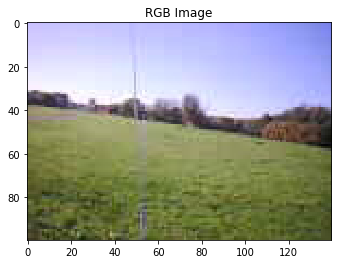

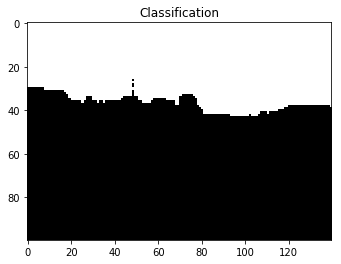

In [1]:
%matplotlib inline
import ROC
im_name = 'CroppedImage.bmp';
segmentation_name = 'TreeSegmentation.bmp';
RGB, Cl, x, y = ROC.get_images_and_grid(im_name, segmentation_name);

<font color='red'><B>Exercise 1.</B></font>
The last line of the code above: `RGB, Cl, x, y = ROC.get_images_and_grid(im_name, segmentation_name);` returned the following elements: an RGB image `RGB`, the classifications in image format `Cl`, and the $x$- and $y$-coordinates in the image (`x` and `y`, as arrays). You are going to use these outputs of the function in order to construct your own 'classifiers' and determine the ROC curves for these classifiers.

1. Run the code below. Can you change the code (by using other channels of `RGB`, or by using `x` or `y`, etc.) so that the ROC curve becomes really good? Why is it good do you think?
2. Can you change the code so that the ROC curve becomes really bad? Why is it so bad do you think?


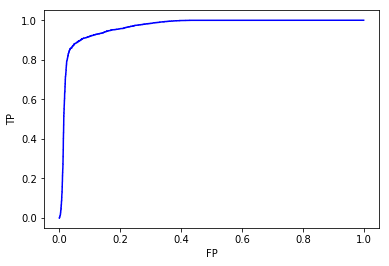

In [2]:
import matplotlib.pyplot as plt

# Change ONLY the following line:
Values = RGB[:,:,0];

# make it a flat list of values, in the right order:
Values = Values.flatten();

# get the ROC curve:
TP, FP = ROC.get_ROC_curve(Values, Cl);

# plot the ROC curve:
plt.figure();
plt.plot(FP, TP, 'b');
plt.ylabel('TP');
plt.xlabel('FP');

## References

[1] Fawcett, T. (2006). An introduction to ROC analysis. Pattern recognition letters, 27(8), 861-874. – Sections 1-5 are relevant to the course.

[2] De Croon, G. C. H. E., De Wagter, C., Remes, B. D. W., & Ruijsink, R. (2011, March). Sky segmentation approach to obstacle avoidance. In Aerospace Conference, 2011 IEEE (pp. 1-16). IEEE.

## Answers

Exercise 1.

1. One can change the line to: ``Values = RGB[:,:,2];``. This gives really good results, as the 3rd channel (index = 2) is the blue channel, and in the given image the sky is blue. So the feature used for thresholding then corresponds well to the concept of the class 'sky'. Another pretty good ROC curve is given by ``Values = -y;``. The reason for this is that in the given image, the sky is in the upper part of the image, so the (negative) y-coordinate captures very well the concept of sky in this limited data set.

2. One can change the line to ``Values = x;``. This gives really bad results, as the x coordinate does not allow for any reasonable threshold. The sky is both left and right in the image, so the x-coordinate does not capture very well the concept of sky.